# Neural Networks

## Overview

The diagram below shows the broad structure of a neural network:

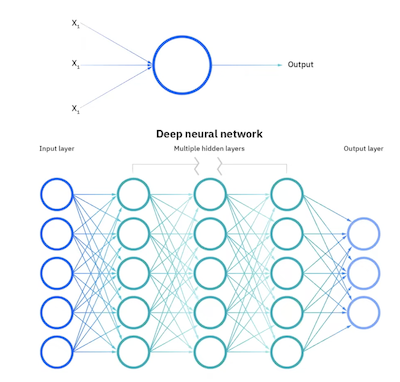

As we can see, the neural network is a stacking of single neurons with multiple layers, where the outputs produced from singular neurons are then the inputs into neurons of the next layer. In this way, the neural network expands upon the single perceptron neuron model and consists of an **input** layer, a series of **hidden** layers, and an **output** layer in the form of a vector that contains our predicted values.

Neural networks are used for a wide variety of tasks including regression and dimensionality reduction, but works particuarly well for classficiation tasks. However, because neural networks incorporate many neurons and allow us to fit our data extremely well, overfitting becomes an issue which makes the validating and testing our model extremely important when it comes to Neural Networks. Typically, the more layers a neural network contains, the more accurate/fit our predictions will be.

## How they work

Now let's explore how neural networks actually work. For simplicity, we'll consider a neural network model with 2 layers and 3 parameters:

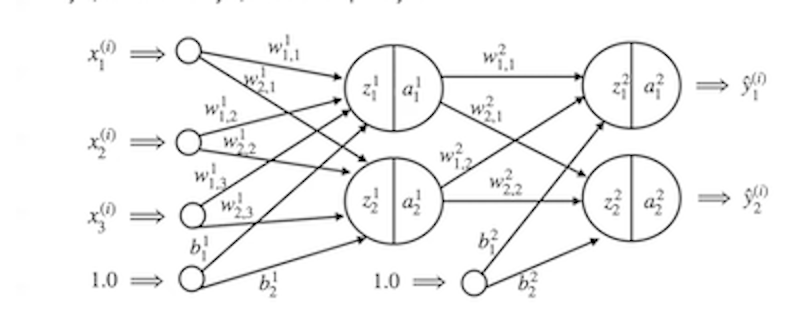

As we can see, given our input data, we assign weights to each variable and pass them through activation functions $z_1$ and $z_2$, which produce outputs that we then send through the 2nd layer in the same fashion. As a result this creates a highly composite function as we compound multiple functions together.

This leads us to the **Universal Approximation Theorem** which states that if $g_1(\cdot), g_2(\cdot), \ldots, g_k(\cdot)$ are the functions computed in layer $m$, and a particular layer-$(m+1)$ node computes $h(\cdot)$, then the composite function computed by the layer-$(m+1)$ node is $h(g_1(\cdot), \ldots, g_k(\cdot))$.

### Phase 1: Feed Forward Phase

The first phase in neural networks is the Feed Forward Phase, which is where our neural network "feeds" our inputs through the neural network to compute predictions for our y values, where each activation function is a composite function containing the activation functions from the previous layers. Various activation functions may be used that will have an influence on the quality of the model.

Next, let's talk about the feedforward phase and backpropagation phase of training a neural network. In the feedforward phase, the inputs are fed into the network, and the outputs are calculated using the weights and biases of the neurons. The output is then compared to the desired output, and the difference is used to calculate a loss function. The goal of training the neural network is to minimize the loss function.

In the backpropagation phase, the error in the output is propagated back through the network to adjust the weights and biases of the neurons. This process involves calculating the gradient of the loss function with respect to the weights and biases of each neuron and updating the weights and biases using a learning rate. The process is repeated until the loss function is minimized, and the neural network is trained.

### Phase 2: Finding Gradient with Back Propogation

Once we've computed predictions, the next step is to evaluate and update our model using gradient descent. We first must develop a loss function which for neural networks is $\frac{1}{2} \sum_{k=1}^N (\hat{y}_k - y_k)^2$ that we are trying to minimize.

 In this phase, we work backwards and figure out where in the model our errors are coming from. To do so, the error in the output is propogated back through the network to adjust the weights and biases of the neurons. This process is quite complex and involves computing the gradient of the loss function with respect to the weights and bias (same as we have earlier) of each neuron and then updating the weights using a learning rate as we did with stochastic gradient descent. Once our loss function is minimized, the neural network is trained.

### Implementation

Now let's implement a neural network on our data to try and predict salary. Let's first fit a neural network as a classifier.

In [1]:
!pip uninstall jax jaxlib -y  # Uninstall both to avoid conflicts
!pip install --upgrade jax jaxlib  # Reinstall the latest version

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Found existing installation: jax 0.4.26
Uninstalling jax-0.4.26:
  Successfully uninstalled jax-0.4.26
Found existing installation: jaxlib 0.4.26
Uninstalling jaxlib-0.4.26:
  Successfully uninstalled jaxlib-0.4.26
  Using cached jax-0.4.26-py3-none-any.whl (1.9 MB)
  Using cached jaxlib-0.4.26-cp310-cp310-manylinux2014_x86_64.whl (78.8 MB)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary (1).csv


Let's first classify a player into 3 classes based on their salary: A player is "Cheap" if their salary is in the bottom third of all NBA salaries, "Medium" if they are in the middle third of all NBA salaries, and "Expensive" if they are in the top third of all NBA salaries.

In [3]:
df = pd.read_csv('salary.csv')
df['Salary_Category'] = pd.qcut(df['Salary'], q=3, labels=["Cheap", "Medium", "Expensive"])

Now let's fit a neural network model to predict one's salary class

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame; replace 'path_to_your_data.csv' with your actual data file
# df = pd.read_csv('path_to_your_data.csv')

# Define features and target
X = df[["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
        "Total Minutes", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%",
        "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP"]].values
y = df["Salary_Category"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target, assuming y contains labels 'Expensive', 'Medium', 'Cheap'
y_decoding = {2: 'Expensive', 1: 'Medium', 0: 'Cheap'}
y_encoding = {label: idx for idx, label in y_decoding.items()}
y_encoded = np.array([y_encoding[label] for label in y])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=0)

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for 'Cheap', 'Medium', 'Expensive'
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=50, verbose=2, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred_classes):.2f}')


Epoch 1/50
9/9 - 4s - loss: nan - accuracy: 0.2923 - val_loss: nan - val_accuracy: 0.3333 - 4s/epoch - 487ms/step
Epoch 2/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 120ms/epoch - 13ms/step
Epoch 3/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 129ms/epoch - 14ms/step
Epoch 4/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 160ms/epoch - 18ms/step
Epoch 5/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 169ms/epoch - 19ms/step
Epoch 6/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 133ms/epoch - 15ms/step
Epoch 7/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 212ms/epoch - 24ms/step
Epoch 8/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_accuracy: 0.3333 - 156ms/epoch - 17ms/step
Epoch 9/50
9/9 - 0s - loss: nan - accuracy: 0.3346 - val_loss: nan - val_a

As we can see, even though a neural network should be more accurate, our data across classes overlaps to such an extent that it is extremely hard to classify our data. Now let's fit a neural network model as a regressor and see how that goes.


Epoch 1/200
9/9 - 2s - loss: 159884838436864.0000 - mean_absolute_error: 7694122.0000 - val_loss: 145244150562816.0000 - val_mean_absolute_error: 7709150.5000 - 2s/epoch - 173ms/step
Epoch 2/200
9/9 - 0s - loss: 159884804882432.0000 - mean_absolute_error: 7694121.5000 - val_loss: 145244133785600.0000 - val_mean_absolute_error: 7709149.5000 - 59ms/epoch - 7ms/step
Epoch 3/200
9/9 - 0s - loss: 159884804882432.0000 - mean_absolute_error: 7694121.0000 - val_loss: 145244100231168.0000 - val_mean_absolute_error: 7709149.0000 - 70ms/epoch - 8ms/step
Epoch 4/200
9/9 - 0s - loss: 159884771328000.0000 - mean_absolute_error: 7694119.5000 - val_loss: 145244049899520.0000 - val_mean_absolute_error: 7709147.0000 - 59ms/epoch - 7ms/step
Epoch 5/200
9/9 - 0s - loss: 159884687441920.0000 - mean_absolute_error: 7694117.5000 - val_loss: 145243966013440.0000 - val_mean_absolute_error: 7709144.5000 - 68ms/epoch - 8ms/step
Epoch 6/200
9/9 - 0s - loss: 159884586778624.0000 - mean_absolute_error: 7694115.5000

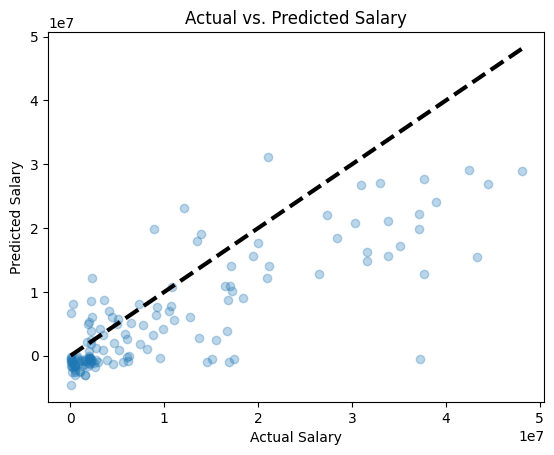

In [5]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load data (assuming 'df' has been loaded correctly)
# df = pd.read_csv('path_to_your_data.csv')

# Define features and target variable for regression
features = ["Age", "GP", "MP", "FG", "FG%", "3P", "3P%", "eFG%", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS",
            "Total Minutes", "PER", "TS%", "3PAr", "FTr", "ORB%", "DRB%", "TRB%", "AST%", "STL%", "BLK%", "TOV%", "USG%",
            "OWS", "DWS", "WS", "WS/48", "OBPM", "DBPM", "BPM", "VORP"]
X = df[features].values
y = df["Salary"].values

# Check for any NaNs or infinite values in the dataset
if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    X = np.nan_to_num(X)  # Replace NaNs with average values and infinite with large finite numbers
    y = np.nan_to_num(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the TensorFlow model
model = Sequential([
    Dense(20, activation='LeakyReLU', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(60, activation='LeakyReLU', kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    Dense(30, activation='LeakyReLU', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model for regression
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Adjust learning rate to avoid overshooting
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

# Train the model with early stopping and gradient clipping to avoid NaNs
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=200, verbose=2, validation_split=0.2, callbacks=[callback])

# Predict and evaluate the model
y_pred = model.predict(X_test).flatten()

# Verify if any NaN values in predictions
if np.any(np.isnan(y_pred)):
    print("NaN values detected in predictions")

# Plotting predictions against actual values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()


As we can see with the above plot and model absolute error, our predictions are pretty good with our neural network model and an enormous improvement from our single perceptron model, showing the tremendous effect that overlaying multiple neurons has in improving model fit. Under our neural network model, we are able to estimate salary within $6 million.